# Question 3

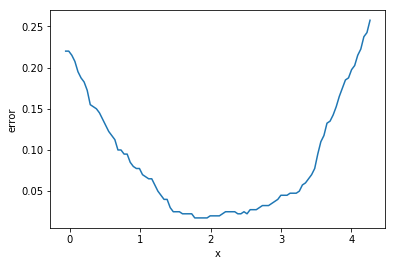

In [45]:


import matplotlib.pyplot as plt
import numpy as np

p = [.5,.5]
samplesize = 400
def randomn(samplesize, p):
    a = np.random.choice(2,samplesize,p = [p[0],p[1]])
    count = 0
    for i in a:
        if i == 1:
            count = count+1
    sampledset = [samplesize-count,count]
    return(sampledset)
from scipy.stats import multivariate_normal
import scipy.linalg as scln
from scipy.spatial import distance
import numpy.linalg as nplin
import statistics
from numpy.linalg import inv
samplingset = randomn(samplesize, p)
mean = np.array([0,0])
cov = np.identity(2)
def mg(mean, cov, sample):
    l = scln.cholesky(cov)
    z = np.random.normal(size=(sample, cov.shape[0]))
    return (z.dot(l)+mean)
x = mg(mean, cov, samplingset[0]).T

mean1 = np.array([3,3])
cov1 = np.identity(2)
x1 = mg(mean1, cov1, samplingset[1]).T

def e(check,errp):
    plt.plot(check,errp)
    plt.ylabel("error")
    plt.xlabel("x")

mean1=np.array([np.mean(x[0,:].T),np.mean(x[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(x1[0,:].T),np.mean(x1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T

s_w=(np.cov(x)*0.5)+(np.cov(x1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@x
y2=w.T@x1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
errp=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
    l11=y1[y1<=i]
    l12=y1[y1>i]
    l22=y2[y2>=i]
    l21=y2[y2<i]
    errp.append((len(l12)+len(l21))/400)
 

e(check,errp)



Text(0.5, 1.0, 'Threshold')

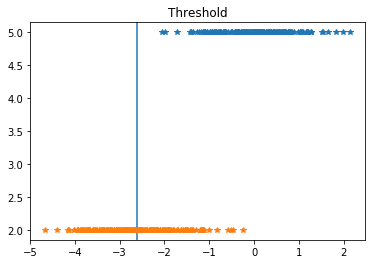

In [75]:
i=np.argmin(np.array(errp))
threshold=check[i]
def plots(y1,y2,threshold):
    ya=[5 for x in range(len(y1))]
    ga=[2 for x in range(len(y2))]
    plt.axvline(x=threshold)
    plt.plot(y1,ya,'*')
    plt.plot(y2,ga,'*')
    plt.plot()
plots(y1,y2,threshold)
plt.title('Threshold')

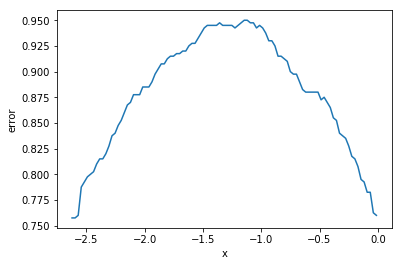

In [71]:
p = [.5,.5]
samplesize = 400
samplingset = randomn(samplesize, p)
mean = np.array([0,0])
cov = np.matrix([[3,1],[1,.8]],dtype=float)
x = mg(mean, cov, samplingset[0]).T
mean = mean.reshape([2,1])
mean1 = np.array([3,3])
x1 = mg(mean1, cov, samplingset[1]).T
mean1 = mean1.reshape([2,1])
mean1=np.array([np.mean(x[0,:].T),np.mean(x[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(x1[0,:].T),np.mean(x1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(x)*0.5)+(np.cov(x1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@x
y2=w.T@x1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
errp=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
    l11=y1[y1<=i]
    l12=y1[y1>i]
    l22=y2[y2>=i]
    l21=y2[y2<i]
    errp.append((len(l12)+len(l21))/400)
 

e(check,errp)

Text(0.5, 1.0, 'Threshold')

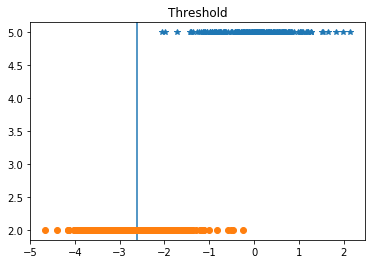

In [72]:
i=np.argmin(np.array(errp))
threshold=check[i]
plots(y1,y2,threshold)
plt.title('Threshold')

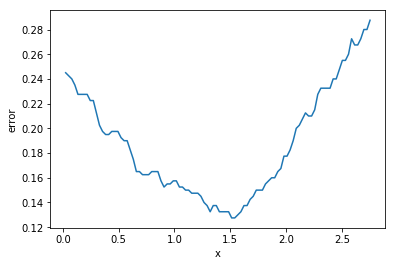

In [29]:
p = [.5,.5]
samplesize = 400
samplingset = randomn(samplesize, p)
mean = np.array([0,0])
cov = np.matrix([[2,.5],[.5,1]],dtype=float)
x = mg(mean, cov, samplingset[0]).T
mean = mean.reshape([2,1])
covinv = cov.I
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([2,2])
cov1 = np.matrix([[2,-1.9],[-1.9,5]],dtype=float)
x1 = mg(mean1, cov1, samplingset[1]).T
mean1 = mean1.reshape([2,1])
mean1=np.array([np.mean(x[0,:].T),np.mean(x[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(x1[0,:].T),np.mean(x1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(x)*0.5)+(np.cov(x1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@x
y2=w.T@x1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
errp=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
    l11=y1[y1<=i]
    l12=y1[y1>i]
    l22=y2[y2>=i]
    l21=y2[y2<i]
    errp.append((len(l12)+len(l21))/400)
 

e(check,errp)

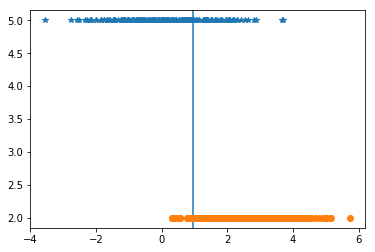

In [27]:
i=np.argmin(np.array(errp))
threshold=check[i]
plots(y1,y2,threshold)

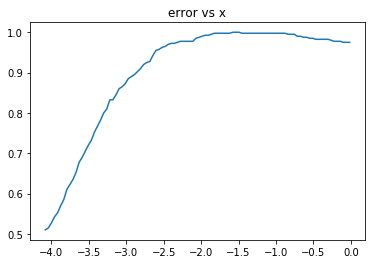

In [30]:
p = [.05,.95]
samplesize = 400
samplingset = randomn(samplesize, p)
mean = np.array([0,0])
cov = np.identity(2)

x = mg(mean, cov, samplingset[0]).T
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([3,3])
cov1 = np.identity(2)

x1 = mg(mean1, cov1, samplingset[1]).T
mean1 = mean1.reshape([2,1])
mean1=np.array([np.mean(x[0,:].T),np.mean(x[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(x1[0,:].T),np.mean(x1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(x)*0.5)+(np.cov(x1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@x
y2=w.T@x1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
errp=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
    l11=y1[y1<=i]
    l12=y1[y1>i]
    l22=y2[y2>=i]
    l21=y2[y2<i]
    errp.append((len(l12)+len(l21))/400)
 

e(check,errp)

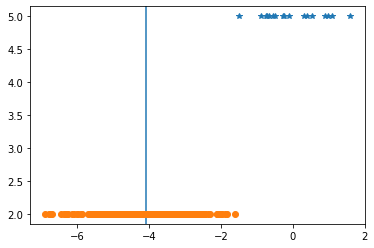

In [31]:
i=np.argmin(np.array(errp))
threshold=check[i]
plots(y1,y2,threshold)

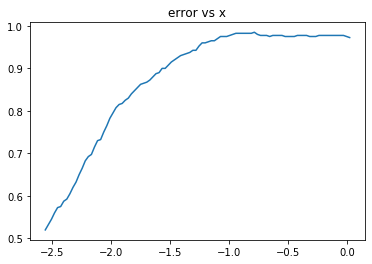

In [32]:
p = [.05,.95]
samplesize = 400
samplingset = randomn(samplesize, p)
mean = np.array([0,0])
cov = np.matrix([[3,1],[1,.8]],dtype=float)

x = mg(mean, cov, samplingset[0]).T
mean = mean.reshape([2,1])
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([3,3])
x1 = mg(mean1, cov, samplingset[1]).T
mean1 = mean1.reshape([2,1])
mean1=np.array([np.mean(x[0,:].T),np.mean(x[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(x1[0,:].T),np.mean(x1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(x)*0.5)+(np.cov(x1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@x
y2=w.T@x1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
errp=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
    l11=y1[y1<=i]
    l12=y1[y1>i]
    l22=y2[y2>=i]
    l21=y2[y2<i]
    errp.append((len(l12)+len(l21))/400)
 

e(check,errp)

Text(0.5, 1.0, 'Threshold')

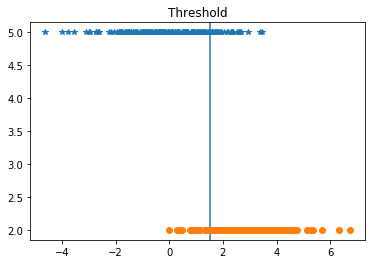

In [33]:
i=np.argmin(np.array(errp))
threshold=check[i]
plots(y1,y2,threshold)
plt.title('Threshold')

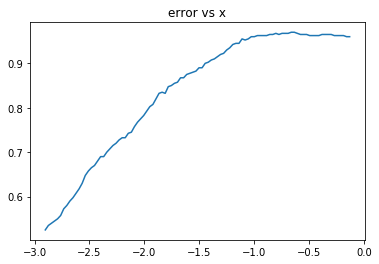

In [34]:
p = [.05,.95]
samplesize = 400
samplingset = randomn(samplesize, p)
mean = np.array([0,0])
cov = np.matrix([[2,.5],[.5,1]],dtype=float)

x = mg(mean, cov, samplingset[0] ).T
mean = mean.reshape([2,1])
covinv = cov.I
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([2,2])
cov1 = np.matrix([[2,-1.9],[-1.9,5]],dtype=float)

x1 = mg(mean1, cov1, samplingset[1] ).T
mean1 = mean1.reshape([2,1])
mean1 = mean1.reshape([2,1])
mean1=np.array([np.mean(x[0,:].T),np.mean(x[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(x1[0,:].T),np.mean(x1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(x)*0.5)+(np.cov(x1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@x
y2=w.T@x1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
errp=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
    l11=y1[y1<=i]
    l12=y1[y1>i]
    l22=y2[y2>=i]
    l21=y2[y2<i]
    errp.append((len(l12)+len(l21))/400)
 

e(check,errp)

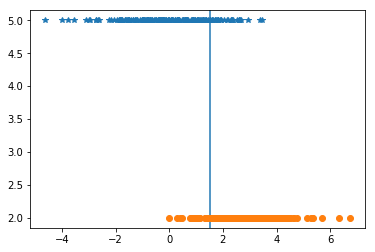

In [30]:
i=np.argmin(np.array(errp))
threshold=check[i]
plots(y1,y2,threshold)